# Математика

## Частные производные

### Синопсис - Производная (для функции 1 переменной)

$$f'(x_{0})= \lim _{{\Delta x\to 0}}{\frac  {\Delta f(x_0)}{\Delta x}} = \lim _{{\Delta x\to 0}}{\frac  {f(x_{0}+\Delta x)-f(x_{0})}{\Delta x}}$$

#### Пример с занятия №1:

$$f(x) = x^2,\:\:\:\:\:\: f{}'(3) = ?$$

In [2]:
def f(x):
    return x**2

dx_list = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
x = 3

for dx in dx_list:
    print ((f(x + dx) - f(x)) / dx)

7
6.1
6.01
6.001
6.00010000001
6.00000999995


## Частные производные (на примере функции 2 переменных)

$$f(x, y) = x^2 + xy$$

In [3]:
def f(x, y):
    return x**2 + x * y

In [4]:
# немного питоноской магии для визуализации

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


def grid(xlim, ylim, num=100):
    x, y = np.meshgrid(np.linspace(*xlim, num=num), np.linspace(*ylim, num=num))
    return x, y


def plot_2d(f, xlim, ylim, grad=None):
    fig = plt.figure(figsize=(15.0, 8.0))

    ax = fig.add_subplot(121, projection='3d')
    ax.set_aspect('equal')
    x, y = grid(xlim, ylim, num=100)
    ax.plot_surface(x, y, f(x, y), cmap=cm.coolwarm, lw=0.5)

    ax = fig.add_subplot(122)
    ax.set_aspect('equal')
    x, y = grid(xlim, ylim, num=100)
    ax.pcolormesh(x, y, f(x, y), cmap=cm.coolwarm)

    if grad is not None:
        x, y = grid(xlim, ylim, num=11)
        u, v = grad(x, y)
        ax.quiver(x, y, u, v)

    return fig

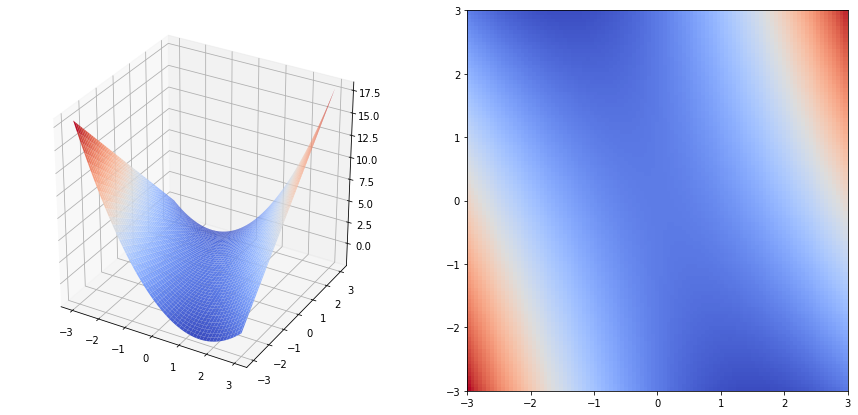

In [5]:
plot_2d(f, xlim=(-3.0, 3.0), ylim=(-3.0, 3.0));

In [5]:
x0, y0 = 1, 2

In [6]:
eps = 0.0001

print u'Частная производная по x:', (f(x0 + eps, y0) - f(x0, y0)) / eps
print u'Частная производная по y:', (f(x0, y0 + eps) - f(x0, y0)) / eps

Частная производная по x: 4.0001
Частная производная по y: 1.0


Можно зафиксировать все переменные кроме  $x$  (в нашем случае зафиксировать  $y=y_0$ ), и рассмотреть функцию  $g(x)=f(x,y_0)$  как функцию одной переменной:

In [7]:
def g(x):
    return f(x, y0)

Ее график получается из графика исходной функции сечением плоскостью  $y=y_0$  (сечения различных для разных  $y_0$ ):

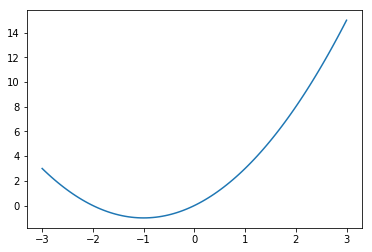

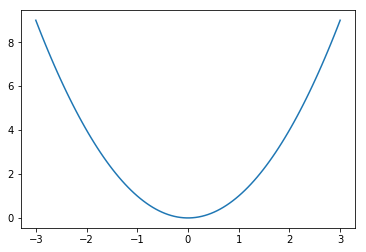

In [8]:
x_grid = np.linspace(-3.0, 3.0, 100)

y0 = 2
plt.plot(x_grid, g(x_grid))
plt.show()

y0 = 0
plt.plot(x_grid, g(x_grid))
plt.show()

Частная производная $\cfrac{\partial f}{\partial x}\left(x_0, y_0\right)$ – это обычная производная $g'(x)$ в точке $x_0$:

In [9]:
y0 = 2

print ((g(x0 + eps) - g(x0)) / eps)

4.0001


## Градиент

### $f(x, y) = x^2 + y^2, \quad \nabla f (x, y) = \left( 2x,\, 2y \right) $

In [10]:
def f(x, y):
    return x**2 + y**2

def f_grad(x, y):
    return (2 * x, 2 * y)

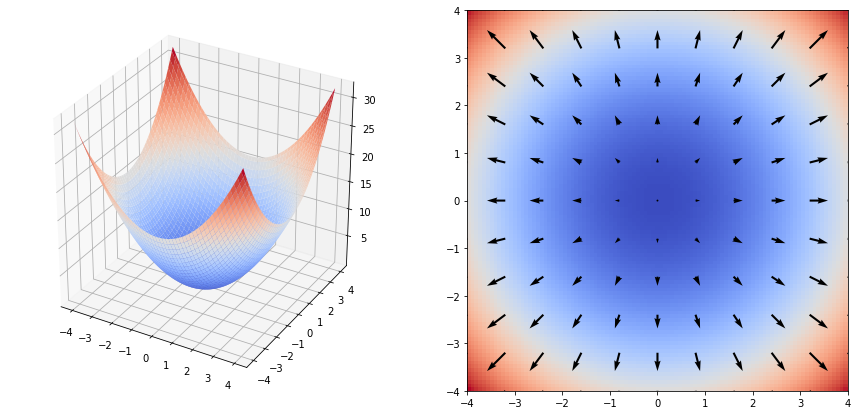

In [11]:
plot_2d(f, grad=f_grad, xlim=(-4.0, 4.0), ylim=(-4.0, 4.0));

В точке $(0, 0)$ экстремум, поэтому градиент в этой точке равен 0.

### $f(x, y) = xy, \quad \nabla f(x, y) = \left( y, \, x \right)$

In [12]:
def f(x, y):
    return x * y

def f_grad(x, y):
    return (y, x)

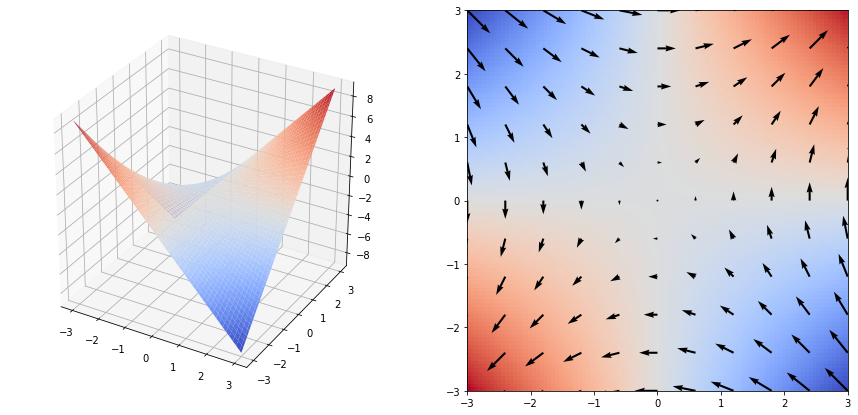

In [13]:
plot_2d(f, grad=f_grad, xlim=(-3.0, 3.0), ylim=(-3.0, 3.0));

В точке $(0, 0)$ градиент равен 0, но экстремума в этой точке нет.

### $f(x, y) = \sin{x} + \sin{y}, \quad \nabla f(x, y) = \left( \cos{x}, \, \cos{y} \right)$

In [14]:
def f(x, y):
    return np.sin(x) + np.sin(y)

def f_grad(x, y):
    return (np.cos(x), np.cos(y))

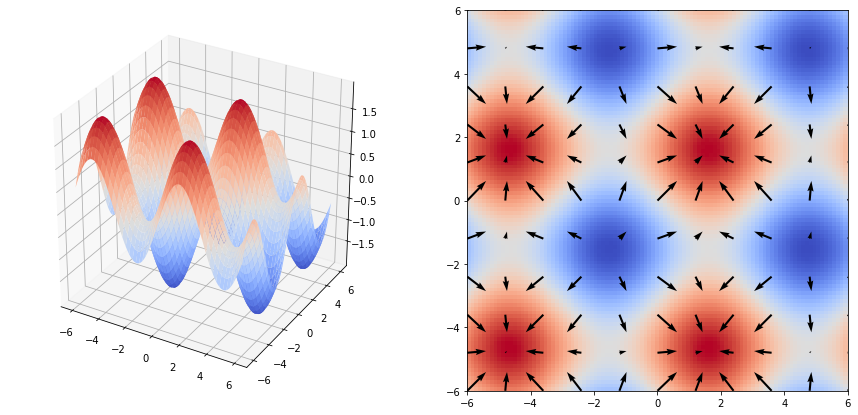

In [15]:
plot_2d(f, grad=f_grad, xlim=(-6.0, 6.0), ylim=(-6.0, 6.0));

### Зачем может быть нужен минимум функции и при чём тут градиент?

Рассмотрим простой случай.

Есть n точек (n>2), через которые хочется провести прямую. С условием, что возможна ситуация, когда некоторые (или все) точки не лежат непосредственно на прямой, но находятся достаточно "близко".

*например, зависимость между реальным ростом людей и записью в журнале хирурга военкомата, измеряющего рост с помощью 20 сантиметровой линейкой* 😄

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
x = np.arange(-3, 3, 0.01)

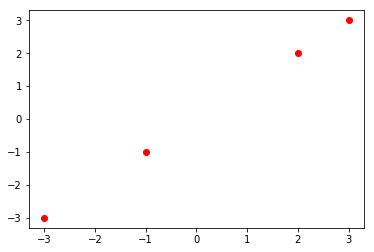

In [18]:
x_list = np.array([-3, -1, 2, 3])
y_list = np.array([-3, -1, 2, 3])

plt.plot(x_list, y_list, 'ro')

### Хороший выбор - евклидова метрика или **квадратичная ошибка:**

$$error(w) = \sum_{i=1}^n {(Y_i - P_i)}^2 $$

In [19]:
from scipy.optimize import minimize

      fun: 1.4030306563732725e-15
 hess_inv: array([[ 0.12637363, -0.00549451],
       [-0.00549451,  0.02197802]])
      jac: array([ -7.50066675e-13,   3.74455050e-13])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ -5.64943813e-09,   9.99999993e-01])

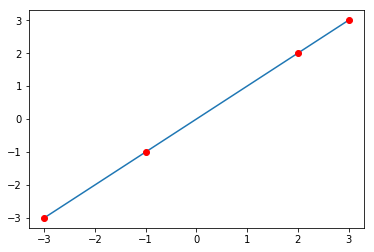

In [20]:
def f(x, w):
    return w[0] + w[1] * x

def MSEf(w):
    return sum((y_list - f(x_list, w))**2)

W0f = [0, 0]

plt.plot(x, f(x, minimize(MSEf, W0f).x))
plt.plot(x_list, y_list, 'ro')

minimize(MSEf, W0f)

In [21]:
x_list = np.array([-3, -2, -1, 0, 1, 2, 3])
y_list = np.array([-4, -2, 0, 0, 2, 0, 3])

      fun: 6.821428571428574
 hess_inv: array([[  7.14285692e-02,   2.87226814e-09],
       [  2.87226814e-09,   1.78571435e-02]])
      jac: array([  5.96046448e-08,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.14285715,  0.96428571])

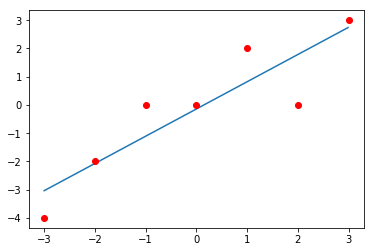

In [22]:
W0f = [0, 0]

plt.plot(x, f(x, minimize(MSEf, W0f).x))
plt.plot(x_list, y_list, 'ro')

minimize(MSEf, W0f)

In [23]:
x_list = np.array([-3, -2, -1, 0, 1, 2, 3])
y_list = np.array([8, 3, 2, 0, 0, -1, -3])

      fun: 9.392857142857146
 hess_inv: array([[  7.14285708e-02,   2.92256791e-10],
       [  2.92256791e-10,   1.78571428e-02]])
      jac: array([ -1.19209290e-07,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 1.28571427, -1.5357143 ])

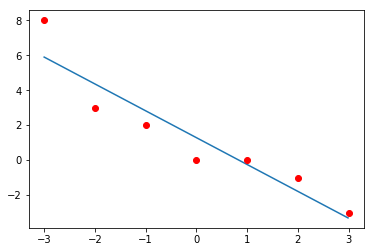

In [24]:
W0f = [0, 0]

plt.plot(x, f(x, minimize(MSEf, W0f).x))
plt.plot(x_list, y_list, 'ro')

minimize(MSEf, W0f)

In [25]:
x_list = np.array([-3, -2, -1, 0, 1, 2, 3])
y_list = np.array([8, 4, 0, 0, 1, 5, 9])

      fun: 81.57142857142857
 hess_inv: array([[  7.14285743e-02,  -1.95657456e-10],
       [ -1.95657454e-10,   1.78571432e-02]])
      jac: array([  9.53674316e-07,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([ 3.85714286,  0.2142857 ])

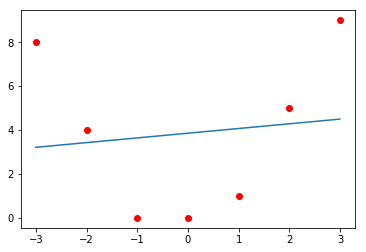

In [26]:
W0f = [0, 0]

plt.plot(x, f(x, minimize(MSEf, W0f).x))
plt.plot(x_list, y_list, 'ro')

minimize(MSEf, W0f)

In [27]:
def g(x, w):
    return w[0] + w[1]*x + w[2]*x**2

def MSEg(w):
    return sum((y_list - g(x_list, w))**2)

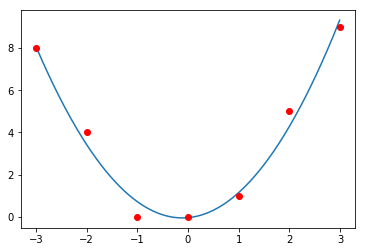

In [28]:
W0g = [0, 0, 0]

minimize(MSEg, W0g)

plt.plot(x, g(x, minimize(MSEg, W0g).x))
plt.plot(x_list, y_list, 'ro')

In [29]:
y_list = np.array([-28, -7, -2, -1, 2, 9, 26])

      fun: 198.28571428571462
 hess_inv: array([[  1.67087447e-01,  -7.71650027e-06,  -2.38701457e-02],
       [ -7.71650027e-06,   1.78574729e-02,   1.10049939e-06],
       [ -2.38701457e-02,   1.10049939e-06,   5.96111522e-03]])
      jac: array([  1.90734863e-06,   3.81469727e-06,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 70
      nit: 11
     njev: 14
   status: 0
  success: True
        x: array([ 0.14285744,  7.07142861, -0.07142862])

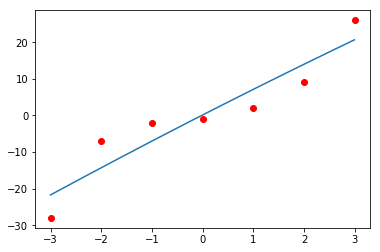

In [30]:
plt.plot(x, g(x, minimize(MSEg, W0g).x))
plt.plot(x_list, y_list, 'ro')
minimize(MSEg, W0g)

      fun: 198.28571428571462
 hess_inv: array([[  1.67087447e-01,  -7.71650027e-06,  -2.38701457e-02],
       [ -7.71650027e-06,   1.78574729e-02,   1.10049939e-06],
       [ -2.38701457e-02,   1.10049939e-06,   5.96111522e-03]])
      jac: array([  1.90734863e-06,   3.81469727e-06,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 70
      nit: 11
     njev: 14
   status: 0
  success: True
        x: array([ 0.14285744,  7.07142861, -0.07142862])

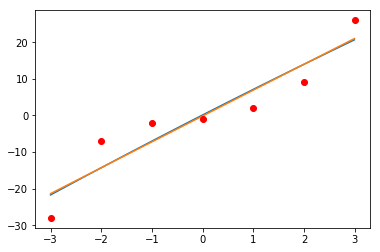

In [31]:
plt.plot(x, g(x, minimize(MSEg, W0g).x))
plt.plot(x, f(x, minimize(MSEf, W0f).x))
plt.plot(x_list, y_list, 'ro')
minimize(MSEg, W0g)

      fun: 5.619047619048203
 hess_inv: array([[  1.66924898e-01,   6.11494640e-04,  -2.38451423e-02,
         -7.15724346e-05],
       [  6.11494640e-04,   1.32730669e-01,  -8.43488642e-05,
         -1.63731540e-02],
       [ -2.38451423e-02,  -8.43488642e-05,   5.95729390e-03,
          9.87244965e-06],
       [ -7.15724346e-05,  -1.63731540e-02,   9.87244965e-06,
          2.33465012e-03]])
      jac: array([  5.96046448e-08,   1.78813934e-07,   5.96046448e-08,
         3.57627869e-07])
  message: 'Optimization terminated successfully.'
     nfev: 66
      nit: 8
     njev: 11
   status: 0
  success: True
        x: array([ 0.1428572 ,  0.46031781, -0.07142859,  0.94444439])

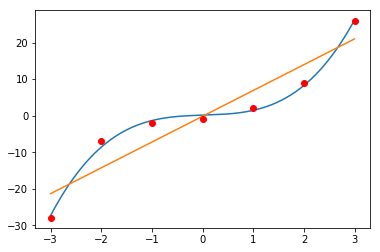

In [32]:
def h(x, w):
    return w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3

def MSEh(w):
    return sum((y_list - h(x_list, w))**2)

W0h = [0, 0, 0, 0]

plt.plot(x, h(x, minimize(MSEh, W0h).x))
plt.plot(x, f(x, minimize(MSEf, W0f).x))
plt.plot(x_list, y_list, 'ro')
minimize(MSEh, W0h)

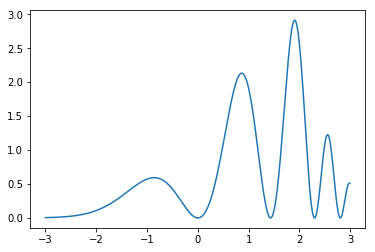

In [33]:
def k(x):
    return 5*np.sin(np.exp(x*0.8))**2*x**2/(np.exp(x**2/2))

plt.plot(x, k(x))

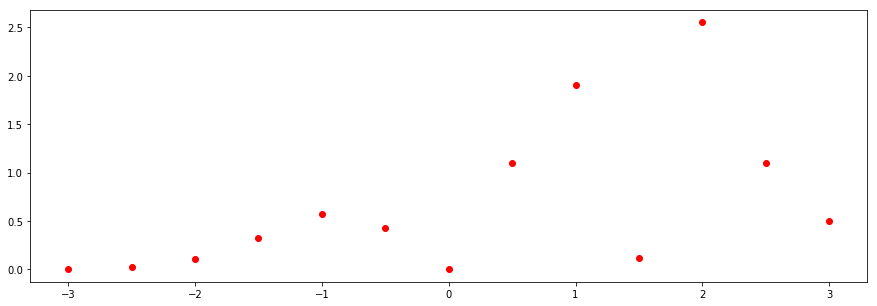

In [34]:
x_list4 = np.arange(-3, 3.1, 0.5)
y_list4 = k(x_list4)

plt.subplots(figsize=(15,5))
plt.plot(x_list4, y_list4, 'ro')

      fun: 4.374840972717824
 hess_inv: array([[  8.74125866e-02,  -1.51264679e-09,  -1.39860120e-02,
          7.46910103e-11,   0.00000000e+00],
       [ -1.51264679e-09,   7.16921950e-02,   8.40593493e-10,
         -9.71250954e-03,   0.00000000e+00],
       [ -1.39860120e-02,   8.40593492e-10,   3.99601014e-03,
         -5.79044096e-10,   0.00000000e+00],
       [  7.46910164e-11,  -9.71250954e-03,  -5.79044098e-10,
          1.55400157e-03,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]])
      jac: array([ -1.19209290e-07,  -1.78813934e-07,   1.19209290e-07,
        -5.96046448e-08,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 63
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 0.79730493,  0.51445415, -0.03601527, -0.04568381,  0.        ])

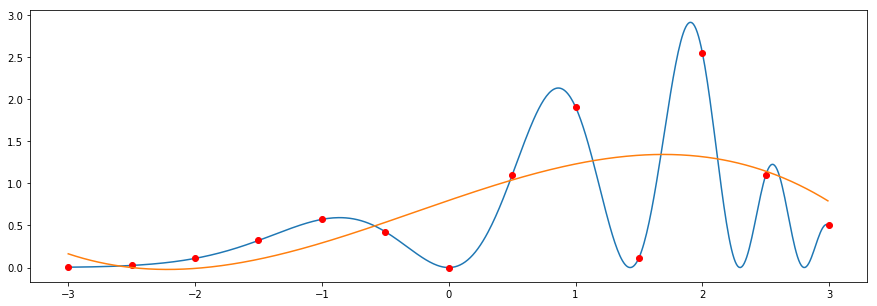

In [35]:
# w0 + w1*x + w2*x**2 + w3*x**3 + w4*x**4

def l(x, w):
    return w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3 + w[4]*x**4

def MSEl(w):
    return sum((y_list4 - h(x_list4, w))**2)

W0l = [0, 0, 0, 0, 0]

plt.subplots(figsize=(15,5))
plt.plot(x, k(x))
plt.plot(x_list4, y_list4, 'ro')
plt.plot(x, l(x, minimize(MSEl, W0l).x))
minimize(MSEl, W0l)

## Визуализация методов оптимизации

http://www.benfrederickson.com/numerical-optimization/